For this analysis I will be looking into 5 counties throughout 1980s to 2020. 
this first set of graphs will be related to economic metrics of productivity, price, and other similar farming metrics in the wine indursty.
the second set of graphs will be comparing weather information of each county across the same years. 
the five counties of interest are Placer, Napa, Marin, Santa Cruz, and Sonoma. 

first i will merge some datasets and group them by year. 

next I will select only the information of interest from those data sets. 

lastly i will produce a series of graphs and save the output to a results folder. 

## Conclusions. 
The literature states that wine and weather have a direct relationship. We can see that in the county where temperature is peaks above 90 degrees year on end, there is a decrease in yield. 

some counties are benefitting from increases in average temperature because it is bringing them into a goldylocks zone where vines are more productive. 

napa and sonoma far outpace other counties in a number of categories of production. and have done so for a long timed.

Placer is by far the coldest county on average and may benefit the most from an increase in temperature. so long as the max temp does not exceed 90 degrees too often. (because thats bad for the grapes). 

In [121]:
# these are the apckages we need 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mlp
from scipy.stats import linregress 
import seaborn as sns


What plots do we want..
1. for each interesting column in weather and production data sets, 
graph it by year and by county. 
2. each set of graphs needs to have the same color for each county. 


In [4]:
wineData = pd.read_csv('resources/Californa_Wine_Production_1980_2020.csv')

# the cutrrent merged data is wrong, need the one below instead. 

sonoma = pd.read_csv('resources/sonoma_weather.csv')
santacruz = pd.read_csv('resources/santa_cruz_weather.csv')
napa = pd.read_csv('resources/napa_weather.csv')
marin = pd.read_csv('resources/marin_weather.csv')
placer = pd.read_csv('resources/placer_weather.csv')

marin.insert(1, 'Name', 'Marin')
napa.insert(1, 'Name', 'Napa')
placer.insert(1, 'Name', 'Placer')
santacruz.insert(1, 'Name', 'SantaCruz')
sonoma.insert(1, 'Name', 'Sonoma')

newMergedWeather = pd.concat([sonoma, marin, placer, napa, santacruz], axis = 0)

# makes new rows for month and year. 
newMergedWeather[['month', 'year']] = newMergedWeather['Month'].str.split(',', expand=True)
newMergedWeather = newMergedWeather.drop('Month', axis=1)




In [4]:
wineDatasm = wineData[wineData['County'].isin(['Placer','Sonoma','Napa','SantaCruz','Marin'],)]

In [5]:
# filtering wine data, only the counties we want and need. 
wineDatasm = wineData[wineData['County'].isin(['Placer','Sonoma','Napa','SantaCruz','Marin'],)]

we can see a great discrepensy in production by county, even with the top five counties. this may be due to the size of the counties themselves. to control for size differences. we can plot via yield (tons per acres).

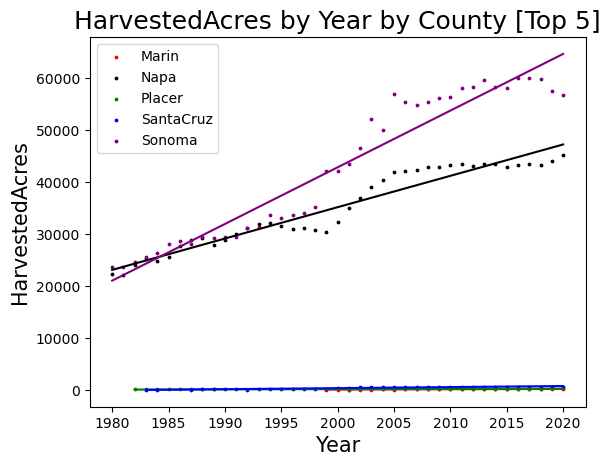

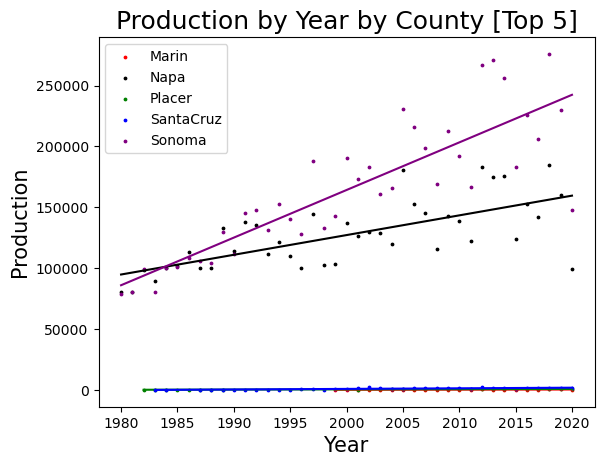

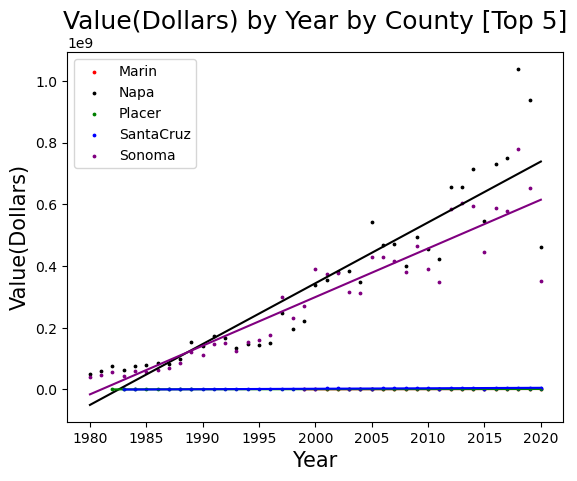

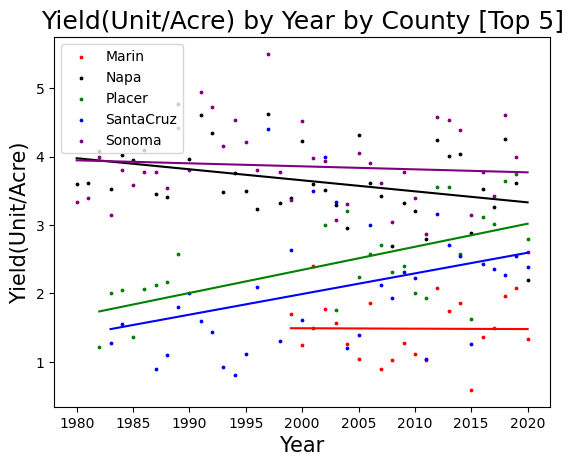

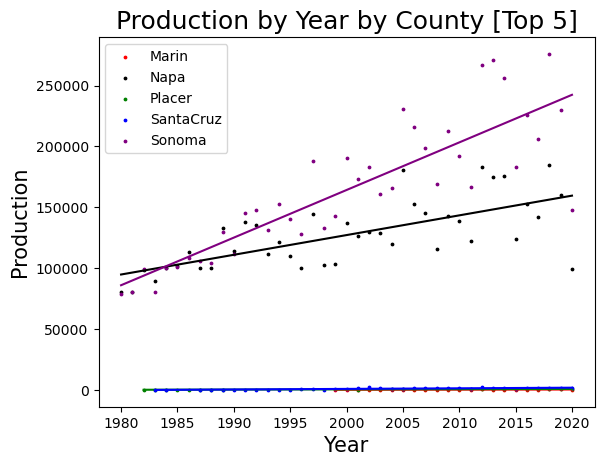

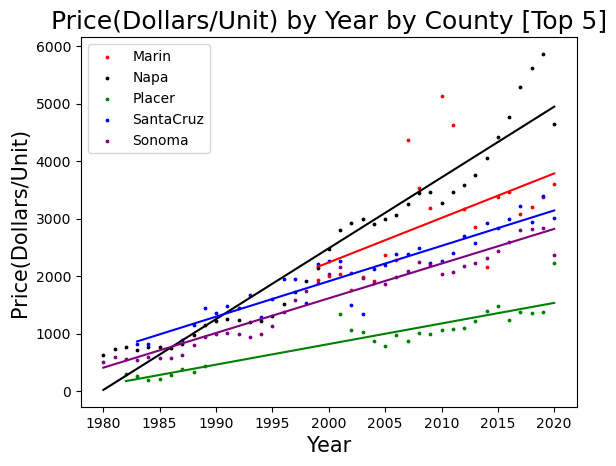

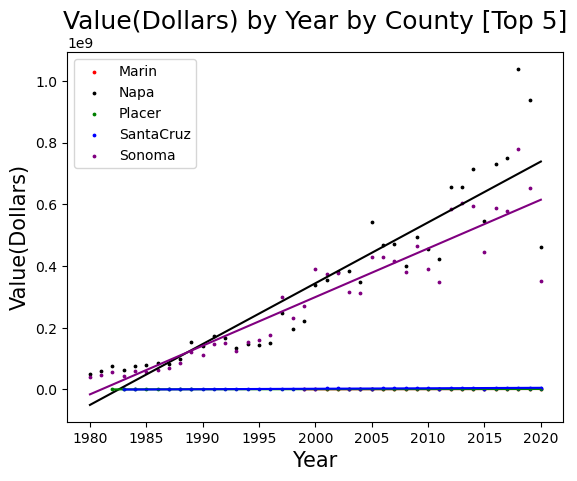

In [50]:

colors = ['red', 'black', 'green', 'blue', 'purple'] # color for each county, shoul be the same for next loop too. 

# columns we want and need
columns = ['HarvestedAcres',  'Production', 'Value(Dollars)','Yield(Unit/Acre)', 'Price(Dollars/Unit)']
filenames = ['results/HarvestedAcres.png',
             'results/Production.png',
              'results/Value(Dollars).png',
              'results/Yield(UnitPerAcre).png',    
              'results/Price(DollarsPerUnit).png'] # names for each files out put 


# loop for graphs. 
for (column, filename) in zip(columns, filenames):
    for (color, county) in zip(colors, wineDatasm['County'].unique()):
        filtered = wineDatasm[wineDatasm['County']== county]
        plt.scatter(filtered['Year'], filtered[column], c=color, label = county, s=3)

        (slope, intercept, rvalue, pvalue, stderr) = linregress(filtered['Year'], filtered[column])
        predicted_y = slope*filtered['Year'] + intercept
        _ = plt.plot(filtered['Year'], predicted_y, color = color) # adds regression line. may not be necesary, but is helpful. 

    plt.title(column+ " by Year by County [Top 5]", fontdict= {'fontsize': 18})
    plt.xlabel("Year", fontdict= {'fontsize': 15})
    plt.ylabel(column, fontdict= {'fontsize': 15})
   
    # need to add legend for counties

    plt.legend() # adds legend for each county and its asociated color 
    plt.savefig(filename) # saved to folder
    plt.show() # need for formatting, not sure why 
 

next steps 

1. compile visualizations
3. make precipitation by year by county
4. out put files to results. 


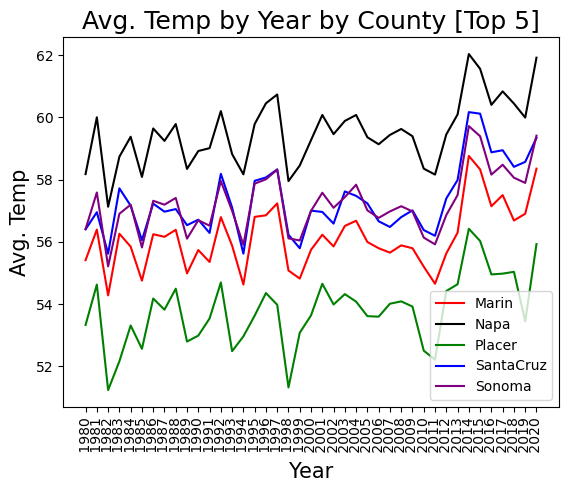

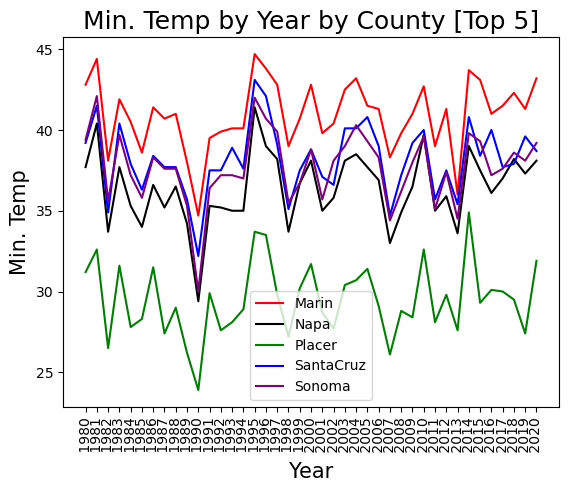

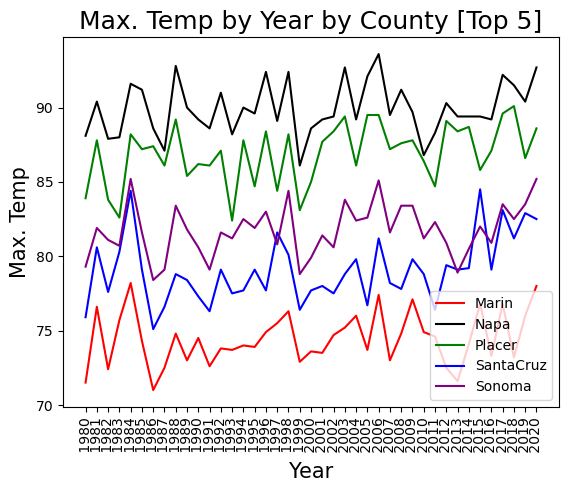

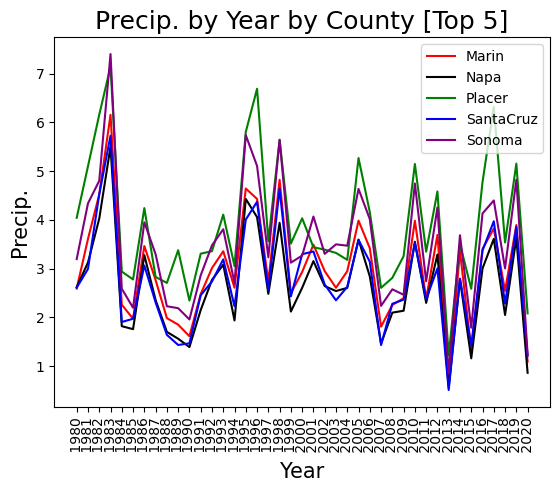

In [52]:
colors = ['red', 'black', 'green', 'blue', 'purple'] # colors for each conunty

columns = [ 'Avg. Temp', 'Min. Temp', 'Max. Temp', 'Precip.'] # each of the graphs needed
filenames = [ 'results/Avg. Temp.png', 'results/Min. Temp.png', 'results/Max. Temp.png', 'results/Precip.png'] # output file names 

# create new dataset that aggregates the month data. 
newMergedWeatherByNameAndYear = newMergedWeather.groupby(["Name", "year"]).agg({"Avg. Temp": 'mean', "Min. Temp": 'min', "Max. Temp": 'max', "Precip.": 'mean'}).reset_index()

# loop to create the graphs 
for (column, filename) in zip(columns, filenames):
    for (color, county) in zip(colors, newMergedWeatherByNameAndYear['Name'].unique()):
        filtered = newMergedWeatherByNameAndYear[newMergedWeatherByNameAndYear['Name']== county]
        plt.plot(filtered['year'], filtered[column], c=color, label = county)
        plt.xticks(rotation = 90, fontsize = 10) # rotates the year ticks

    plt.title(column+ " by Year by County [Top 5]", fontdict= {'fontsize': 18})
    plt.xlabel("Year", fontdict= {'fontsize': 15})
    plt.ylabel(column, fontdict= {'fontsize': 15})
   
    # need to add legend for counties
    plt.legend()
    plt.savefig(filename) # saves out put to new folder. 

    plt.show() # need this for formatting, not sure why. 

    